# Business Questions:

- Which Artist appear most often? How often does he/she appear?
- Which song appears in most countries?
- Which Album appears in most countries?
- what is the average songlength in the countries with the longest songlengths?
- Find top 10 Countries with longest average Song length
- display distribution of song-length over all countries

In [6]:
import pandas as pd

df = pd.read_csv("outputs/music_hits_all_countries.csv")

df.head()
df.info()

df_null_values = df[df["Artist"].isna()]

print(df_null_values)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4730 entries, 0 to 4729
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Song          4728 non-null   object
 1   Artist        4720 non-null   object
 2   Album         4728 non-null   object
 3   Duration      4730 non-null   object
 4   Duration_sec  4730 non-null   int64 
 5   country_name  4730 non-null   object
dtypes: int64(1), object(5)
memory usage: 221.8+ KB
                                                   Song Artist  \
788                                                 NaN    NaN   
3396                                                NaN    NaN   
4597        Der Papst und sein Elektro-Papamobil (#022)    NaN   
4598  Revolution im Vatikan: Frauen an der Spitze (#...    NaN   
4599                 Die Bibel und Außerirdische (#024)    NaN   
4600                         Ein Sturm zieht auf (#025)    NaN   
4601                  Ein Mühlstein um den H

In [7]:
# removing Null Values (mainly vatican)
df.dropna(inplace=True)


In [8]:
df.dtypes

Song            object
Artist          object
Album           object
Duration        object
Duration_sec     int64
country_name    object
dtype: object

# display distribution of song-length over all countries

<Figure size 640x480 with 0 Axes>

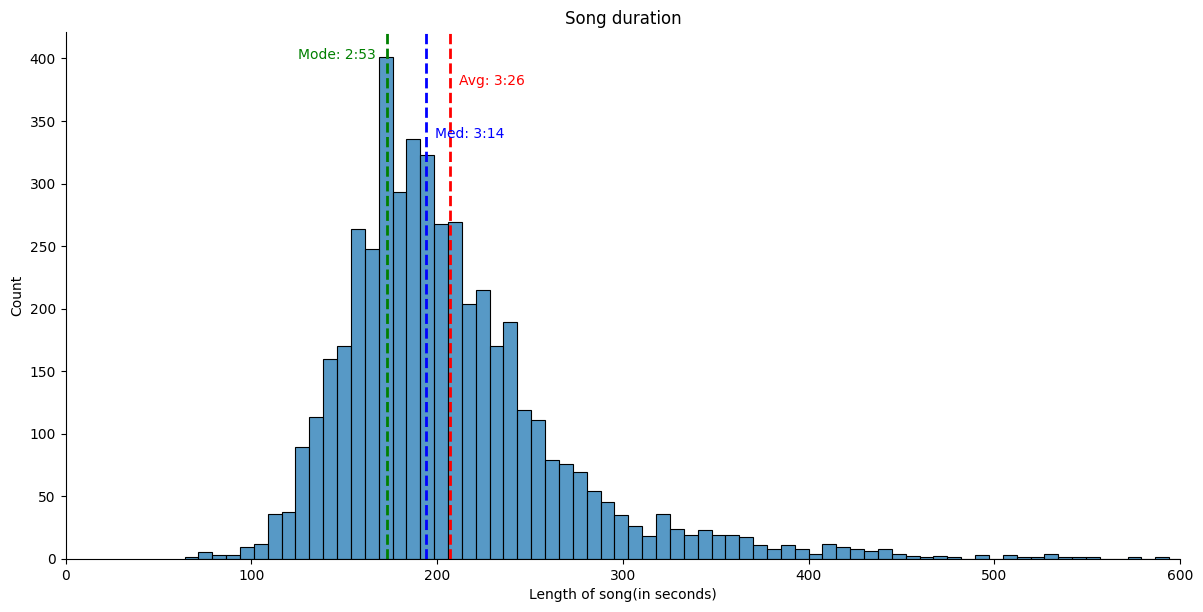

In [19]:
# distribution of Song-length

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average duration
avg_duration = df["Duration_sec"].mean()
median_duration = df["Duration_sec"].median()
mode_duration = df["Duration_sec"].mode()[0]

# avg_duration_rounded = round(avg_duration, 1)
# median_duration_rounded = round(median_duration, 1)
# mode_duration_rounded = round(mode_duration, 1)

# Convert seconds to mm:ss
def sec_to_min_sec(seconds):
    minutes = int(seconds // 60)
    secs = int(seconds % 60)
    return f"{minutes}:{secs:02d}"


plt.figure()
sns.displot(df["Duration_sec"], height=6, aspect=2)  
plt.xlabel("Length of song(in seconds)")
plt.xlim(0, 600)  # x-axis from 0 to 600 seconds
plt.title("Song duration")


# Add vertical line for average
plt.axvline(avg_duration, color='red', linestyle='--', linewidth=2)
plt.text(avg_duration + 5, plt.ylim()[1]*0.9, f'Avg: {sec_to_min_sec(avg_duration)}', color='red')

# Add vertical line for median
plt.axvline(median_duration, color='blue', linestyle='--', linewidth=2)
plt.text(median_duration + 5, plt.ylim()[1]*0.8, f'Med: {sec_to_min_sec(median_duration)}', color='blue')

# Add vertical line for mode
plt.axvline(mode_duration, color='green', linestyle='--', linewidth=2)
plt.text(mode_duration - 48, plt.ylim()[1]*0.95, f'Mode: {sec_to_min_sec(mode_duration)}', color='green')

plt.show()


# Find top 10 Countries with longest average Song length

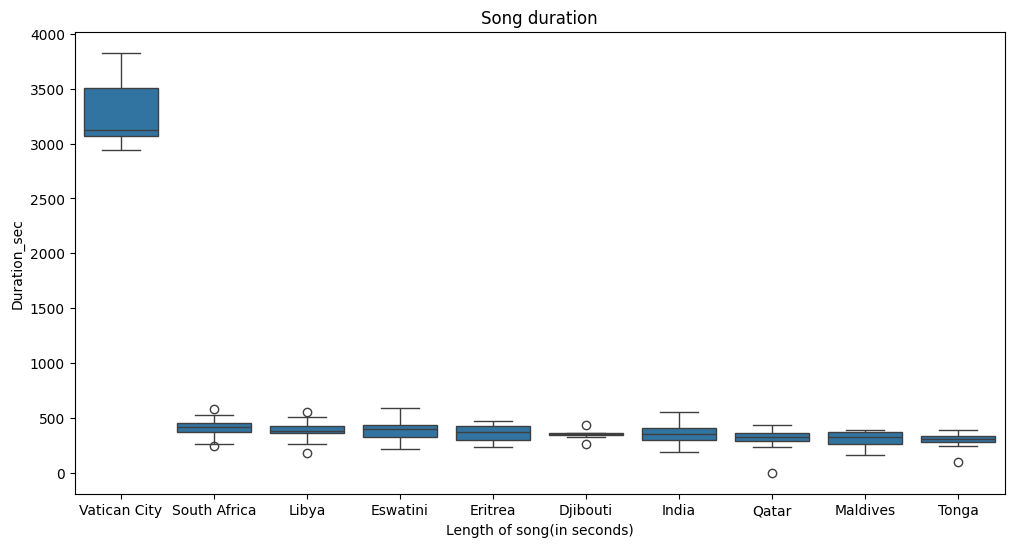

In [ ]:
# distribution of Song-length
import matplotlib.pyplot as plt
import seaborn as sns


# Compute average song length per country
country_avg_duration = df.groupby('country_name')['Duration_sec'].mean()

# Filter the DataFrame to include only these countries
top10_avg_countries = country_avg_duration.sort_values(ascending=False).head(10)
df_top10_avg = df[df['country_name'].isin(top10_avg_countries.index)]
plt.figure(figsize=(12, 6))  # set width and height
sns.boxplot(y=df_top10_avg["Duration_sec"], x=df_top10_avg["country_name"], order=top10_avg_countries.index)  # use x= for single variable
plt.xlabel("Length of song(in seconds)")

plt.title("Song duration")
plt.show()

# Which Artist appear most often? How often does he/she appear?

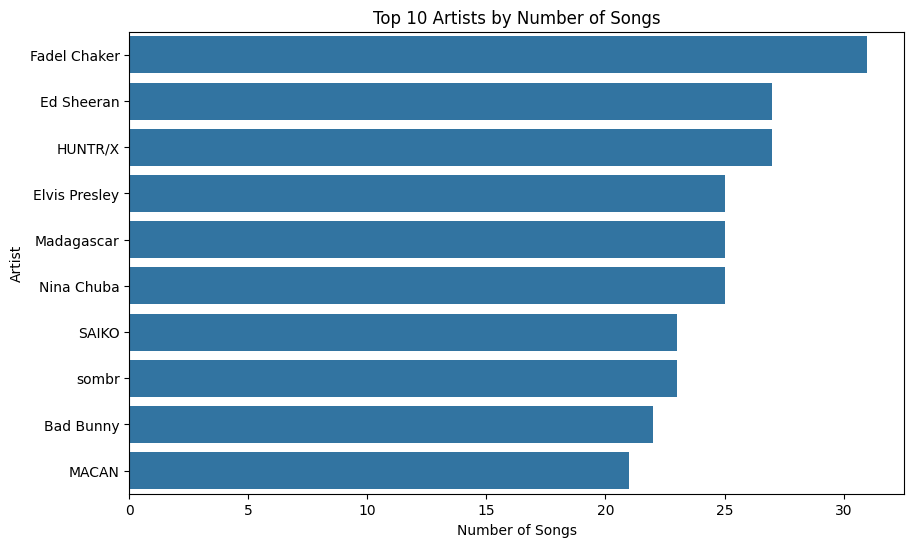

In [ ]:
df_artist = df.groupby("Artist")["Song"].count()

top10_artists = df_artist.sort_values(ascending=False).head(10)

# Convert Series to DataFrame for easier plotting
top10_df = top10_artists.reset_index()
top10_df.columns = ['Artist', 'Song_Count']

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='Song_Count', y='Artist', data=top10_df)
plt.xlabel("Number of Songs")
plt.ylabel("Artist")
plt.title("Top 10 Artists by Number of Songs")
plt.show()

# Which Album appears in most countries?

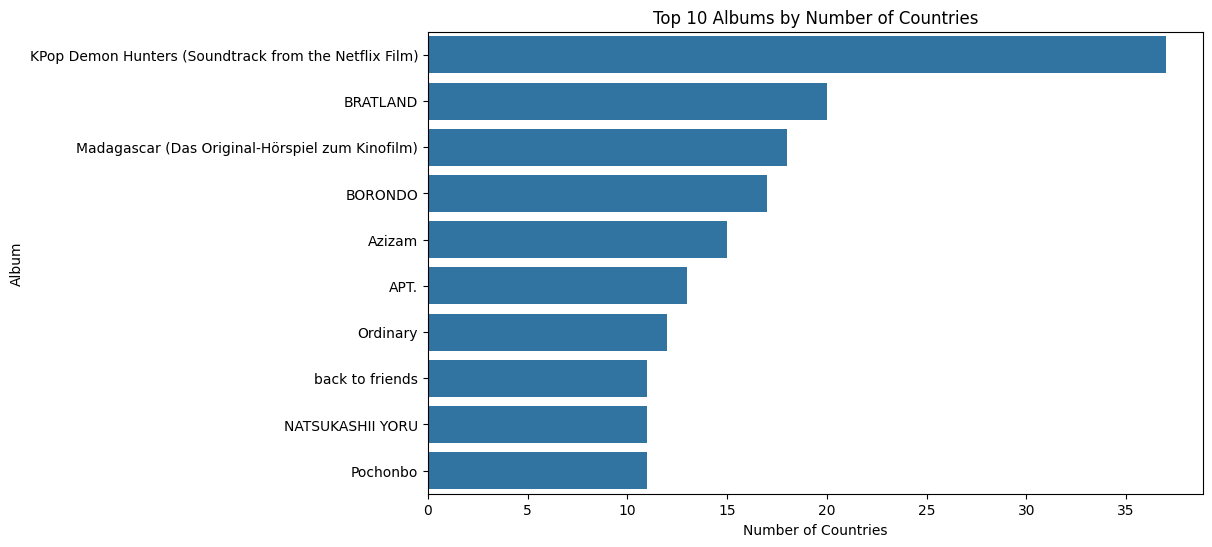

In [ ]:


df_artist = df.groupby("Album")["country_name"].count()

top10_artists = df_artist.sort_values(ascending=False).head(10)

# Convert Series to DataFrame for easier plotting
top10_df = top10_artists.reset_index()
top10_df.columns = ['Album', 'Song_Count']

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='Song_Count', y='Album', data=top10_df)
plt.xlabel("Number of Countries")
plt.ylabel("Album")
plt.title("Top 10 Albums by Number of Countries")
plt.show()

# Which song appears in most countries?

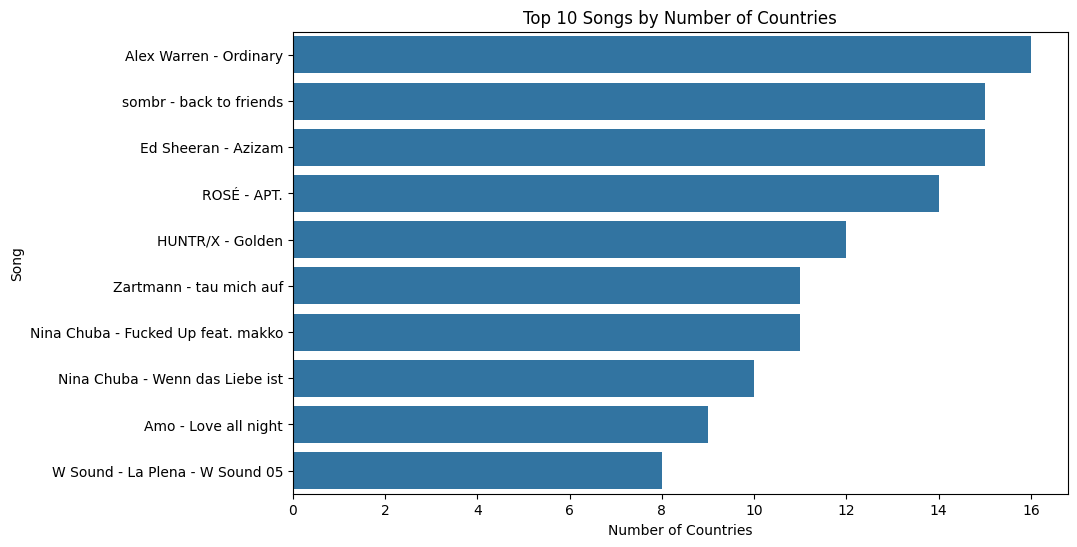

In [ ]:
df["artist_and_songname"] = df["Artist"] + " - " + df["Song"]
df_artist = df.groupby("artist_and_songname")["country_name"].count()

top10_artists = df_artist.sort_values(ascending=False).head(10)

# Convert Series to DataFrame for easier plotting
top10_df = top10_artists.reset_index()
top10_df.columns = ['Song', 'Song_Count']

# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='Song_Count', y='Song', data=top10_df)
plt.xlabel("Number of Countries")
plt.ylabel("Song")
plt.title("Top 10 Songs by Number of Countries")
plt.show()

Summary:
- Vatican City has by far the longest songs in the datasample
- Average songlength over the entire dataset is 212 Seconds (=3:32 Min)
- Fadel Chaker and Ed Sheeran are most popular artists 
- kPop Demon Hunters is the most popular Album
- Alex Warrens son “Ordinary is most popular in the given Data Sample
- the Playlists are more random than anticipated. I was excpecting the common superstars to be most common but I don't even know most artists in the dataset
